## In this Notebook, we give the code of the Restricted Boltzmann Machine.
The first cells load a dataset on which you will be able to run the learning process.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [20]:
# Loading artificial dataset !
path = ''
X = np.genfromtxt(path+'art4clus.d')
u,s,v = np.linalg.svd(X/X.shape[1]**0.5)
Xsc = np.matmul(X.T,u)

In [70]:
# The dimension of the dataset : 100 inputs and 200 samples
print(X.shape)

(100, 2000)


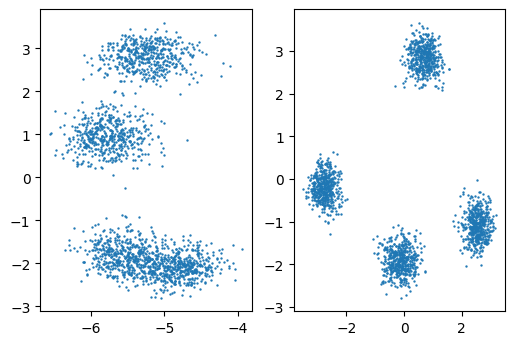

In [5]:
# scatter plot on the SVD modes of the dataset
f,ax = plt.subplots(1,2,dpi=100)
ax[0].scatter(Xsc[:,0],Xsc[:,1],s=0.5)
ax[1].scatter(Xsc[:,2],Xsc[:,3],s=0.5)

For the training we need many functions:
  * the sigmoid function
  * a function that samples the hidden variables conditionnaly on a visible state p(\tau|vis)
  * a function that samples the visible variables conditionnaly on a hidden state p(vis|\tau)
  * a function doing sampling by alternating the two previous steps
  * a function to update the parameters - weights and biases

In [6]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [7]:
# X is Nv X M
# W is Nh x Nv
def SampleHiddens(X,W,b):
    mh = sigmoid(np.matmul(W,X) + b.reshape(W.shape[0],1))
    h = (np.random.random(mh.shape) < mh)*1
    return h,mh

In [8]:
# H is Nh X M
# W is Nh x Nv
def SampleVisibles(H,W,a):
    mv = sigmoid(np.matmul(W.T,H) + a.reshape(W.shape[1],1))
    v = (np.random.random(mv.shape) < mv)*1
    return v,mv

In [9]:
def GetAv(Xchain,W,a,b,it_max=20):
    v_init = np.copy(Xchain)
    h,mh_pos = SampleHiddens(v_init,W,b)
    v,mv = SampleVisibles(h,W,a)
    
    for t in range(1,it_max):
        h,mh = SampleHiddens(v,W,b)
        v,mv = SampleVisibles(h,W,a)
        
    return v_init,mh_pos,v,h

In [10]:
def Sampling(X,W,a,b,it_max=20):
    h,mh = SampleHiddens(X,W,b)
    v,mv = SampleVisibles(h,W,a)
    
    h,mh = SampleHiddens(v,W,b)
    v,mv = SampleVisibles(h,W,a)
    
    for t in range(it_max):
        h,mh = SampleHiddens(v,W,b)
        v,mv = SampleVisibles(h,W,a)
        
    return v,mv,h,mh

In [11]:
def updateWeights(v_pos,h_pos,v_neg,h_neg,W,a,b,lr):
    W += lr*(np.matmul(h_pos,v_pos.T) - np.matmul(h_neg,v_neg.T)) / v_pos.shape[1]
    a += lr*(np.sum(v_pos,axis=1) - np.sum(v_neg,axis=1)) / v_pos.shape[1]
    b += lr*(np.sum(h_pos,axis=1) - np.sum(h_neg,axis=1)) / h_pos.shape[1]

In [71]:
def fit_batch(X,Xchain,W,a,b,lr,it_max=20):
    _, h_pos = SampleHiddens(X,W,b)
    _,_,Xchain,h = GetAv(Xchain,W,a,b,it_max=it_max)
    updateWeights(X,h_pos,Xchain,h,W,a,b,lr)

In [72]:
# implement batches
def getMiniBatches(X,m,bs):
    return X[:,m*bs:(m+1)*bs]

In [73]:
# number of inputs
Nv = X.shape[0] 

# number of hidden nodes
Nh = 50 

# minibatch size
bs = 100 
NB = int(X.shape[1]/bs) 

# initialization of the weight matrix
W = np.random.normal(0,1e-4,size=(Nh,Nv)) 
# initialization of the visible bias
a = np.zeros(Nv) 
# initialization of the hidden bias
b = np.zeros(Nh)

# learning rate
lr = 0.02 
# number of epoch
t_max = 100 

0
20
40
60
80


In [ ]:
# Run the algoruithm !
for t in range(t_max):
    if t%20 ==0:
        print(t)
    for m in range(NB):
        Xb = getMiniBatches(X,m,bs)
        Xchain = np.random.random((Nv,bs))
        fit_batch(Xb,Xchain,W,a,b,lr,it_max=10)

In [87]:
# Generate samples
NS = 2000
VisInit = np.random.random((Nv,NS))
Xgen,_,_,_ = Sampling(VisInit,W,a,b,it_max=1000)

In the next cells we look at the learning results
  * the learned features using the SVD of the weight matrix
  * the scatter plot of generated data

In [88]:
ug,sg,vg = np.linalg.svd(Xgen/2000**0.5)

In [89]:
uw,sw,vw = np.linalg.svd(W)
Xsc = np.matmul(X.T,vw)
Xsc_gen = np.matmul(Xgen.T,vw)

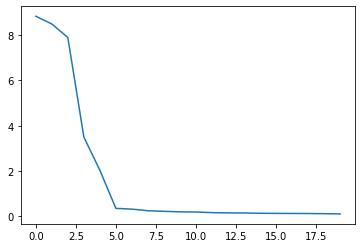

In [94]:
plt.plot(sw[:20])

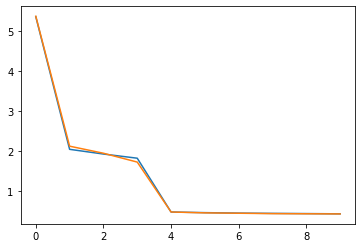

In [91]:
# Eigenvalues of the dataset and the generated data
plt.plot(s[:10])
plt.plot(sg[:10])

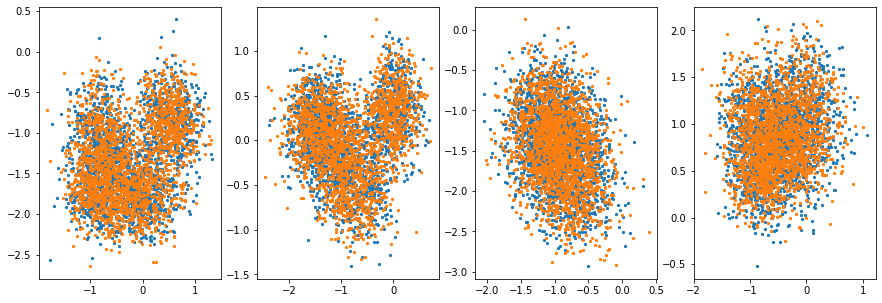

In [92]:
f,ax = plt.subplots(1,4,figsize=(15,5))
ax[0].scatter(Xsc[:,0],Xsc[:,1],s=5)
ax[1].scatter(Xsc[:,2],Xsc[:,3],s=5)
ax[2].scatter(Xsc[:,4],Xsc[:,5],s=5)
ax[3].scatter(Xsc[:,6],Xsc[:,7],s=5)
ax[0].scatter(Xsc_gen[:,0],Xsc_gen[:,1],s=5)
ax[1].scatter(Xsc_gen[:,2],Xsc_gen[:,3],s=5)
ax[2].scatter(Xsc_gen[:,4],Xsc_gen[:,5],s=5)
ax[3].scatter(Xsc_gen[:,6],Xsc_gen[:,7],s=5)

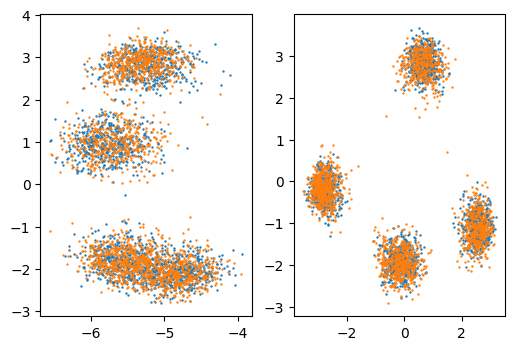

In [93]:
ux,sx,vx = np.linalg.svd(X/X.shape[1]**0.5)

Xsc = np.matmul(X.T,ux)
Xsc_gen = np.matmul(Xgen.T,ux)

f,ax = plt.subplots(1,2,dpi=100)
ax[0].scatter(Xsc[:,0],Xsc[:,1],s=0.5)
ax[1].scatter(Xsc[:,2],Xsc[:,3],s=0.5)
ax[0].scatter(Xsc_gen[:,0],Xsc_gen[:,1],s=0.5)
ax[1].scatter(Xsc_gen[:,2],Xsc_gen[:,3],s=0.5)

## TODO:
It is very inefficient to initialize each time the MC chains to random values. Can you modify the program to re-used the previous final state of the MC chains  instead ?
  1. modify fit_batch
  2. modify the main for loop


In [ ]:
def fit_batch(X,Xchain,W,a,b,lr,it_max=20):
    # ...
    return 

In [ ]:
# init
Xchain = # ...

for t in range(t_max):
    #...

It is quite usual to learn the MNIST dataset. You can use the next line to load the dataset and try it.

In [ ]:
import gzip
import pickle
import wget

url = 'https://www.lri.fr/~adecelle/content/data/mnist.pkl.gz'
filename = wget.download(url) # you can also download it manually

f = gzip.open('mnist.pkl.gz', 'rb')
u = pickle._Unpickler(f)
u.encoding = 'latin1'
p = u.load()
train_set, _, _ = p

X = train_set[0][:10000,:].T

In [ ]:
f,ax = plt.subplots(10,10,figsize=(10,10))
idx = 0

for i in range(10):
    for j in range(10):
        ax[i,j].imshow(train_set[0][idx,:].reshape(28,28),cmap='gray')
        ax[i,j].set_xticks([])
        ax[i,j].set_yticks([])
        idx += 1

In [ ]:
# loading M=10000 data
X = train_set[0][:10000,:].T

In [ ]:
# init
Nv = 784
Nh = 500
bs = 25
NB = int(X.shape[1]/bs)
W = np.random.normal(0,1e-4,size=(Nh,Nv))
a = np.zeros(Nv)
b = np.zeros(Nh)
Xchain = np.random.random((Nv,bs))
lr = 0.01
t_max = 50